In [62]:
from atm_data.data_utils.weather_noaa_data import *
from pathlib import Path
from ast import literal_eval
import pandas as pd

import matplotlib.pyplot as plt

In [80]:
data_dir = Path.cwd().resolve().parent / 'data/noaa_lcdv2'
weather_path = data_dir / 'lcd_lga_1987-2023_cleaned.parquet'

start_date = "2019-07-01"
end_date = "2019-08-01" # exclusive

wdf = pd.read_parquet(weather_path)
wdf = wdf.loc[(wdf.index >= start_date) & (wdf.index < end_date)]
display(wdf)

display(wdf.dtypes)

sdf = pd.read_parquet


,hourly_alitmeter_setting,hourly_dew_point_temperature,hourly_dry_bulb_temperature,hourly_precipitation,hourly_relative_humidity,hourly_visibility,hourly_wind_direction,hourly_wind_speed,hourly_wind_gust_speed,hourly_present_weather_type,...,hsc_layer_1_height,hsc_layer_2_height,hsc_layer_3_height,hsc_total_coverage,hsc_total_amount,hsc_total_height,hsc_ceiling_coverage,hsc_ceiling_amount,hsc_ceiling_height,hourly_sky_conditions
date,,,,,,,,,,,,,,,,,,,,,
2019-07-01 00:00:00,1011.9,12.2,21.1,0.0,57.0,16.093,330.0,4.6,0.0,[],...,NaN,NaN,NaN,,0.0,inf,,0.0,inf,
2019-07-01 01:00:00,1012.2,12.8,20.6,0.0,61.0,16.093,320.0,5.1,0.0,[],...,NaN,NaN,NaN,,0.0,inf,,0.0,inf,
2019-07-01 02:00:00,1012.5,13.3,20.0,0.0,65.0,16.093,320.0,5.7,0.0,[],...,inf,NaN,NaN,CLR,0.0,inf,,0.0,inf,CLR:00-inf
2019-07-01 03:00:00,1012.5,12.8,20.0,0.0,63.0,16.093,330.0,4.1,0.0,[],...,inf,NaN,NaN,CLR,0.0,inf,,0.0,inf,CLR:00-inf
2019-07-01 04:00:00,1012.5,12.8,20.0,0.0,63.0,16.093,330.0,4.6,0.0,[],...,NaN,NaN,NaN,,0.0,inf,,0.0,inf,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31 19:00:00,1015.9,19.4,23.3,0.0,79.0,16.093,80.0,2.6,0.0,[],...,15.24,45.72,76.20,OVC,8.0,76.20,BKN,7.0,45.72,FEW:02-15.24 BKN:07-45.72 OVC:08-76.2
2019-07-31 20:00:00,1016.6,18.3,23.9,0.0,71.0,16.093,160.0,2.6,0.0,[],...,15.24,42.67,48.77,BKN,7.0,48.77,BKN,7.0,42.67,FEW:02-15.24 BKN:07-42.67 BKN:07-48.77
2019-07-31 21:00:00,1016.9,18.9,23.3,0.0,76.0,16.093,20.0,2.1,0.0,[],...,15.24,57.91,NaN,BKN,7.0,57.91,BKN,7.0,57.91,FEW:02-15.24 BKN:07-57.91


hourly_alitmeter_setting         float64
hourly_dew_point_temperature     float64
hourly_dry_bulb_temperature      float64
hourly_precipitation             float64
hourly_relative_humidity         float64
hourly_visibility                float64
hourly_wind_direction            float64
hourly_wind_speed                float64
hourly_wind_gust_speed           float64
hourly_present_weather_type       object
hpwt_BCFG                        boolean
hpwt_BL                          boolean
hpwt_BLSN                        boolean
hpwt_BR                          boolean
hpwt_DRSN                        boolean
hpwt_DZ                          boolean
hpwt_FG                          boolean
hpwt_FU                          boolean
hpwt_FZDZ                        boolean
hpwt_FZFG                        boolean
hpwt_FZRA                        boolean
hpwt_GR                          boolean
hpwt_GS                          boolean
hpwt_HAIL                        boolean
hpwt_HZ         

date
2019-07-18    10.226933
2019-07-23    11.239474
2019-07-05    11.330780
2019-07-06    15.490971
2019-07-19    17.534247
Name: hsc_ceiling_height, dtype: float64

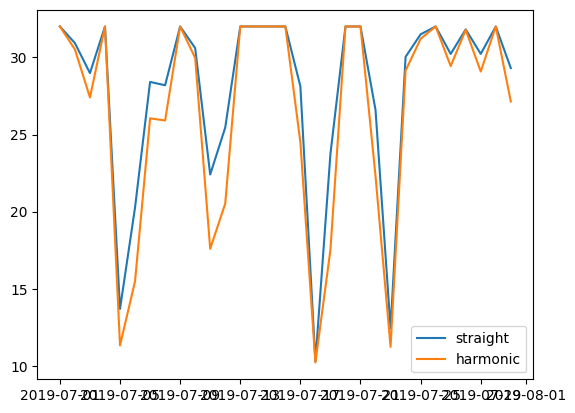

In [92]:
ch_daily_finite_mean = (
    wdf.hsc_ceiling_height    
    .loc[~wdf.hsc_ceiling_height.isin([np.inf])]
    .groupby(pd.Grouper(freq='1D'))
    .mean()
)

ch_daily_min = (
    wdf.hsc_ceiling_height    
    .groupby(pd.Grouper(freq='1D'))
    .min()
)

# probably not a term?
ch_daily_inverse_mean = (
    (1.0 / wdf.hsc_ceiling_height)    
    .groupby(pd.Grouper(freq='1D'))
    .mean()
)
ch_daily_harmonic_mean = (
    1.0 / ch_daily_inverse_mean
)

# ch_hourly_clipped = df.hsc_ceiling_height.clip(lower=10, upper=32)
ch_hourly_clipped = wdf.hsc_ceiling_height.clip(lower=10, upper=32)

ch_daily_clipped_mean = (
    ch_hourly_clipped
    .groupby(pd.Grouper(freq='1D'))
    .mean()
)
ch_daily_clipped_inverse_mean = (
    (1.0 / ch_hourly_clipped)    
    .groupby(pd.Grouper(freq='1D'))
    .mean()
)
ch_daily_clipped_harmonic_mean = (
    1.0 / ch_daily_clipped_inverse_mean
)

display(ch_daily_clipped_harmonic_mean.nsmallest(5))

plt.plot(ch_daily_clipped_mean, label='straight')
plt.plot(ch_daily_clipped_harmonic_mean, label='harmonic')
plt.legend()

